# CAPTCHA EDA
## By Sergei Issaev
### Introduction
This notebook is part of the preprocessing pipeline which takes in CAPTCHA images and outputs the solution. This is the first notebook in the four part series, which can be used as an EDA, and wherein I define step-by-step the preprocessing performed in order to invert, segment and save each of the 10 alphanumerics. For a more complete description, please see my article published at: https://medium.com/@sergei740.

### Import Libraries

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random

### Load Data

In [2]:
tot_size = len(os.listdir('/kaggle/input/captcha-images/'))
num = random.randint(0, tot_size)
print(num)
alli = list(os.listdir('/kaggle/input/captcha-images/'))
file = alli[num]
print(file)

8503
Fr3ExC7G4y.jpg


In [3]:
solution = file.split('.')[0]
solution

'Fr3ExC7G4y'

In [4]:
hi = cv2.imread('/kaggle/input/captcha-images/' + file)

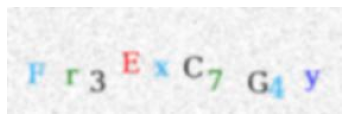

In [5]:
plt.imshow(hi, cmap="gray")
plt.axis('off')
plt.show()

### Preprocessing

In [6]:
# convert to RGB
image = cv2.cvtColor(hi, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

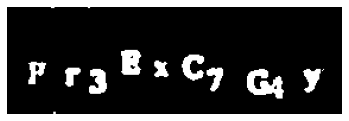

In [7]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.axis('off')
plt.show()

In [8]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

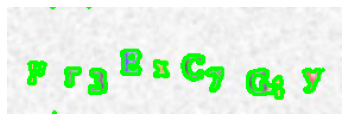

In [9]:
# show the image with the drawn contours
plt.imshow(image)
plt.axis('off')
plt.show()

### Sort Contours

In [10]:
x = {}
for m in range(len(contours)):
    mini = 1000
    for k in range(len(contours[m])):
        first = contours[m][k][0][0]
        if first < mini:
            mini = first
    mini1 = mini
    #print(mini1)
    
    mini = 1000
    for k in range(len(contours[m])):
        first = contours[m][k][0][1]
        if first < mini:
            mini = first
    mini2 = mini
    #print(mini2)
    
    maxi = 0
    for k in range(len(contours[m])):
        first = contours[m][k][0][1]
        if first > maxi:
            maxi = first
    maxi2 = maxi
    #print(maxi2)
    
    maxi = 0
    for k in range(len(contours[m])):
        first = contours[m][k][0][0]
        if first > maxi:
            maxi = first
    maxi1 = maxi
    #print(maxi1)
    x[m] = maxi2 - mini2

In [11]:
biggie = sorted(x, key=x.get)

In [12]:
s = {}
def plotting(num):
    m = biggie[num]
    mini = 1000
    for k in range(len(contours[m])):
        first = contours[m][k][0][0]
        if first < mini:
            mini = first
    mini1 = mini
    #print(mini1)

    mini = 1000
    for k in range(len(contours[m])):
        first = contours[m][k][0][1]
        if first < mini:
            mini = first
    mini2 = mini
   # print(mini2)

    maxi = 0
    for k in range(len(contours[m])):
        first = contours[m][k][0][1]
        if first > maxi:
            maxi = first
    maxi2 = maxi
    #print(maxi2)

    maxi = 0
    for k in range(len(contours[m])):
        first = contours[m][k][0][0]
        if first > maxi:
            maxi = first
    maxi1 = maxi
    #print(maxi1)
    ret = [mini2, maxi2, mini1, maxi1]
    s[num] = mini1
    return ret

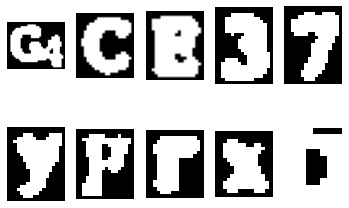

In [13]:
fig, axs = plt.subplots(2, 5)
wow = plotting(-1)
axs[0, 0].imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
axs[0,0].axis('off')
wow = plotting(-2)
axs[0, 1].imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
axs[0,1].axis('off')
wow = plotting(-3)
axs[0,2].imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
axs[0,2].axis('off')
wow = plotting(-4)
axs[0,3].imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
axs[0,3].axis('off')
wow = plotting(-5)
axs[0,4].imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
axs[0,4].axis('off')
wow = plotting(-6)
axs[1,0].imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
axs[1,0].axis('off')
wow = plotting(-7)
axs[1,1].imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
axs[1,1].axis('off')
wow = plotting(-8)
axs[1,2].imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
axs[1,2].axis('off')
wow = plotting(-9)
axs[1,3].imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
axs[1,3].axis('off')
wow = plotting(-10)
axs[1,4].imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
axs[1,4].axis('off')
wow = plotting(-11)


### Sort left to right

In [14]:
siggie = sorted(s, key=s.get)

In [15]:
def checkforerror(wow):
    white = cv2.countNonZero(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2])
    total = (binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2]).shape[0] * (binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2]).shape[1]
    div = white/total
    if div > 0.63: 
        if (wow[1] - wow[0]) - (wow[3] - wow[2]) > -5:
            return True
    elif div < 0.29:
        return True
    else: return False
def checkforerrorout(wow):
    white = cv2.countNonZero(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2])
    total = (binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2]).shape[0] * (binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2]).shape[1]
    div = white/total
    return div
def checkfordoubles(wow):
    if (wow[1] - wow[0]) - (wow[3] - wow[2]) < -4: 
        if checkforerrorout(wow) < 0.56: return True
    elif (wow[1] - wow[0]) - (wow[3] - wow[2]) < 1:
        if checkforerrorout(wow) < 0.40: return True
    else: return False

test 1 False
False
0.4015151515151515
False
test 2 False


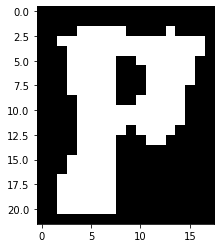

In [16]:
wow = plotting(siggie[0])
plt.imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
print('test 1', checkforerror(wow))
print((wow[1] - wow[0]) - (wow[3] - wow[2]) < -4)
print(checkforerrorout(wow))

print((wow[1] - wow[0]) - (wow[3] - wow[2]) < 1)
print('test 2', checkfordoubles(wow))

a =  0 desired =  10
using position 0 0
trying to plot  0 checking for errors...
% =  0.4015151515151515
No errors found!
DONE PLOTTING - im 0
a =  1 desired =  10
using position 0 1
trying to plot  1 checking for errors...
% =  0.7875
Error 1 at 1
im bumped to 2
trying to plot  2 checking for errors...
% =  0.4243421052631579
No errors in bumped image
a =  2 desired =  10
using position 0 2
trying to plot  3 checking for errors...
% =  0.5185185185185185
No errors found!
DONE PLOTTING - im 3
a =  3 desired =  10
using position 0 3
trying to plot  4 checking for errors...
% =  0.6125
No errors found!
DONE PLOTTING - im 4
a =  4 desired =  10
using position 0 4
trying to plot  5 checking for errors...
% =  0.8888888888888888
Error 1 at 4
im bumped to 6
trying to plot  6 checking for errors...
% =  0.4666666666666667
No errors in bumped image
a =  5 desired =  10
using position 1 0
trying to plot  7 checking for errors...
% =  0.4381818181818182
No errors found!
DONE PLOTTING - im 7
a = 

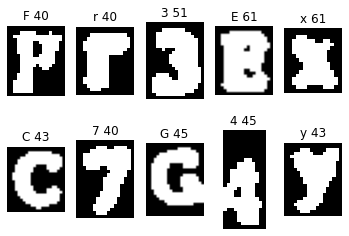

In [17]:
pos = 0
a = 0
im = 0
desired = 10
fig, axs = plt.subplots(2, 5)
first = False
while a < desired:
    print('a = ', a, 'desired = ', desired)
    
    n1 = pos // 5
    n2 = pos % 5
    print('using position', n1, n2)
    wow = plotting(siggie[im])
    print('trying to plot ', im, 'checking for errors...')
    err = checkforerror(wow)
    errs = checkfordoubles(wow)
    print('% = ', checkforerrorout(wow))
    if err:
        print('Error 1 at', a)
        #plt.imshow(binary[wow[0]-2:wow[1] + 2, wow[2]-2:wow[2] + half +7], cmap = 'gray')
        #inp = str(input('Skip this image? '))
        im += 1
        print('im bumped to', im)
        wow = plotting(siggie[im])
        print('trying to plot ', im, 'checking for errors...')
        err = checkforerror(wow)
        errs = checkfordoubles(wow)
        print('% = ', checkforerrorout(wow))
        if errs:
            
            
            print('Error 2 at bumped image')
            if first == False:
                half = abs(wow[0] - wow[1]) // 2
                axs[n1, n2].imshow(binary[wow[0]-2:wow[1] + 2, wow[2]-2:wow[2] + half +7], cmap = 'gray')
                xx = checkforerrorout(wow)
                axs[n1,n2].set_title(solution[pos]+' '+ str(int(xx * 100)))
                axs[n1,n2].axis('off')
                im -= 1
                first = True
            else:
                axs[n1, n2].imshow(binary[wow[0]-2:wow[1] + 2, wow[2] + half + 7:wow[3]+2], cmap = 'gray')
                xx = checkforerrorout(wow)
                axs[n1,n2].set_title(solution[pos]+' '+ str(int(xx * 100)))
                axs[n1,n2].axis('off')
                first = False

        
        
        else:
            print('No errors in bumped image')
            axs[n1, n2].imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
            #xx = checkforerrorout(wow)
            axs[n1,n2].set_title(solution[pos]+' '+ str(int(xx * 100)))
            axs[n1,n2].axis('off')
    elif errs:
        print('Error 2 at', a)
        if first == False:
            half = abs(wow[0] - wow[1]) // 2
            axs[n1, n2].imshow(binary[wow[0]-2:wow[1] + 2, wow[2]-2:wow[2] + half +8], cmap = 'gray')
            xx = checkforerrorout(wow)
            axs[n1,n2].set_title(solution[pos]+' '+ str(int(xx * 100)))
            axs[n1,n2].axis('off')
            im -= 1
            first = True
        else:
            axs[n1, n2].imshow(binary[wow[0]-2:wow[1] + 2, wow[2] + half + 8:wow[3]+2], cmap = 'gray')
            xx = checkforerrorout(wow)
            axs[n1,n2].set_title(solution[pos]+' '+ str(int(xx * 100)))
            axs[n1,n2].axis('off')
            first = False
            
    else:
        print('No errors found!')
        axs[n1, n2].imshow(binary[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
        xx = checkforerrorout(wow)
        axs[n1,n2].set_title(solution[pos]+' '+ str(int(xx * 100)))
        axs[n1,n2].axis('off')
        print('DONE PLOTTING - im', im)

    a += 1
    pos += 1
    im += 1

### Compare the above segmentations with the original image

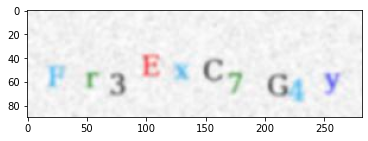

In [18]:
plt.imshow(hi, cmap="gray")
plt.show()

### Conclusion
The above segmentation looks good. We can move on to the next file, captchas_saving.ipynb, where we will save to disk each segmentation in its appropriate directory. 
Thank you for reading, and if you enjoyed my work please don't forget to leave an upvote!